In [27]:
import pandas as pd
import numpy as np

In [28]:
df=pd.read_csv("//Users//harikolguri//Desktop//ML//KNN//KNN_Project_Data")

In [59]:
df.head()

In [30]:
y=df['TARGET CLASS']
X=df.copy()

In [32]:
X.drop('TARGET CLASS',axis=1,inplace=True)

In [60]:
X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


#### Observations: The features are present in various scales hence we need to starndardize the feature

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sclar=StandardScaler()
data=sclar.fit_transform(X)

In [36]:
data=pd.DataFrame(data=data,columns=X.columns)

In [37]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

#### Train Test split with stratify

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.3,stratify=y)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

## Part 1: 
#### Perform KNN with 1 nearest neighbour

In [64]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
pred=model.predict(X_test)
print(confusion_matrix(y_test,pred))


[[101  31]
 [ 50 118]]


In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       132
           1       0.79      0.70      0.74       168

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



#### Observation we see an accuracy of 73% . Let's try to improve the accuracy using various values of k

In [96]:
error=[]
for k in range(1,21):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error.append(np.mean(pred!=y_test))
 
    

In [97]:
print(error)

[0.26, 0.24, 0.21, 0.2, 0.21666666666666667, 0.22333333333333333, 0.20333333333333334, 0.22, 0.21, 0.21666666666666667, 0.19, 0.20666666666666667, 0.21, 0.2, 0.19333333333333333, 0.19, 0.19666666666666666, 0.19666666666666666, 0.19, 0.19]


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Plok k vs error rate and choose the kvalue with least error rate to make predections on test data

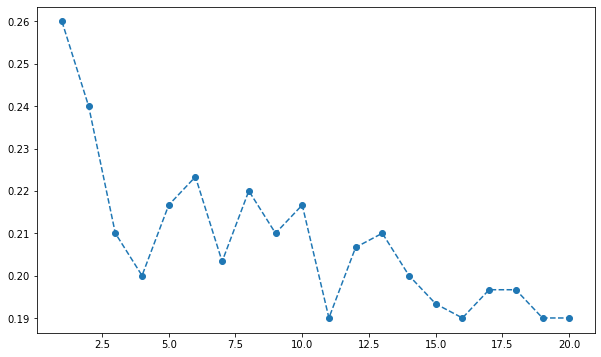

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error,linestyle='--',marker='o')

In [ ]:
#convert list into numpy arry to retreive min and max values /arguments 
nperror=np.array(error)
# print(nperror.argmax())
# print(nperror.max())

In [103]:
model=KNeighborsClassifier(n_neighbors=nperror.argmin())
model.fit(X_train,y_train)
pred=model.predict(X_test)


In [104]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[122  31]
 [ 34 113]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       153
           1       0.78      0.77      0.78       147

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## Part 2: Use Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [ ]:
error=[]
for k in range(1,40):
    model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,X_train,y_train,cv=5)
    print(scores)
    error.append(scores.mean())

#print(error)
 

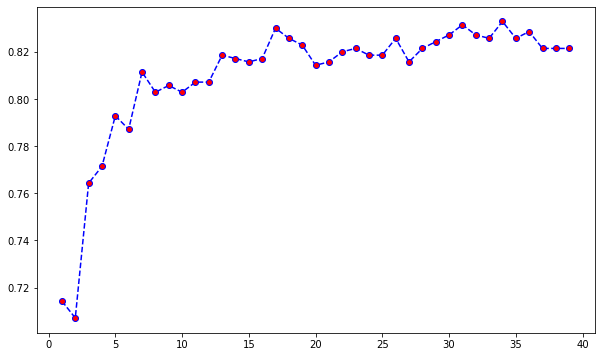

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,linestyle='--',color='blue',marker='o',markerfacecolor='red')

In [50]:
nperror=np.array(error)
print(nperror.argmax())
print(nperror.max())

33
0.832857142857143


In [51]:
model=KNeighborsClassifier(n_neighbors=nperror.argmax())
model.fit(X_train,y_train)
pred=model.predict(X_test)


In [52]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[121  29]
 [ 25 125]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       150
           1       0.81      0.83      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



### Conclusion: Choosing the best k value combined with cross validation helped us to improve the predection accuracy. 